## Exercise 07 : Heatmap

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql("""
SELECT uid, strftime('%w', timestamp) AS weekday, strftime('%H', timestamp) AS hour, COUNT(*) AS num_commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY 1, 2, 3
""", con)
df.sort_values('num_commits', ascending=False, inplace=True)

In [4]:
days = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}
df['weekday'] = df['weekday'].astype('int')
df['hour'] = df['hour'].astype('int')
df['weekday'] = df['weekday'].map(days)

In [5]:
weekday = df.pivot_table(index='weekday', columns='uid', values='num_commits', aggfunc='sum', fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = weekday.reindex(ordered_days)

hour = df.pivot_table(index='hour', columns='uid', values='num_commits', aggfunc='sum', fill_value=0)

In [6]:
weekday

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,3,0,0,0,2,3,50,0,10,8,...,0,0,9,46,2,5,35,1,0,0
Tuesday,0,0,16,0,1,57,87,0,5,4,...,0,7,26,11,3,0,86,0,5,0
Wednesday,0,1,37,0,0,0,0,0,0,1,...,0,44,32,0,1,0,33,4,3,0
Thursday,0,39,77,0,7,4,17,5,14,17,...,15,12,25,7,20,7,108,2,0,15
Friday,0,0,1,0,0,0,0,0,0,0,...,0,7,1,59,3,35,61,0,0,0
Saturday,0,1,4,0,7,28,79,4,0,32,...,0,12,2,3,22,90,0,2,0,46
Sunday,0,43,2,8,76,23,26,20,31,0,...,27,32,26,8,21,7,45,9,0,26


In [7]:
hour

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
hour,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,2,0,2,0,0
1,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
6,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,3,0,0,20,3,0,0,1,...,0,0,0,0,2,0,0,0,0,0
8,0,0,9,0,10,11,6,0,0,2,...,0,0,0,6,2,0,0,0,1,6
9,0,0,0,0,10,10,4,2,0,0,...,0,0,1,3,2,1,0,0,0,0
10,0,0,0,0,10,8,2,0,0,7,...,0,2,0,2,0,0,26,0,0,5


In [8]:
weekday = weekday[weekday.sum(axis=0).sort_values(ascending=False).index]
hour = hour[hour.sum(axis=0).sort_values(ascending=False).index]

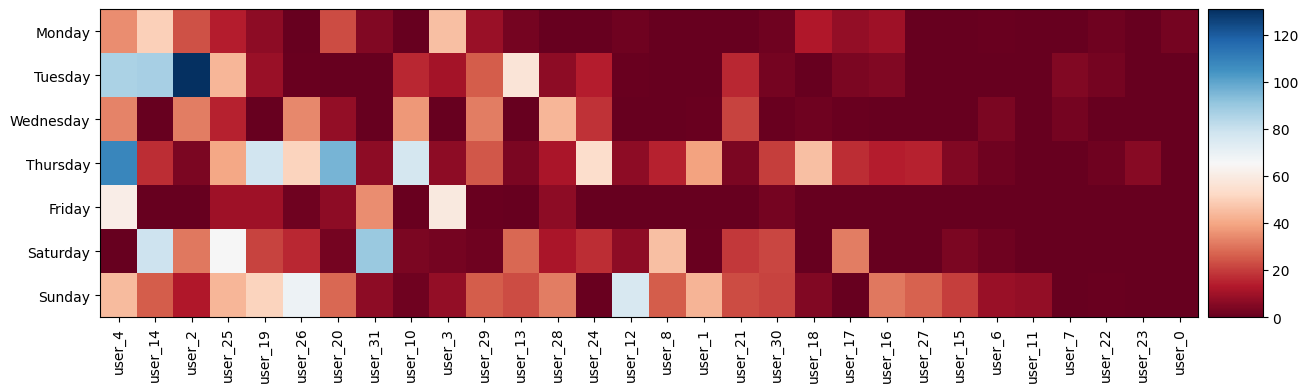

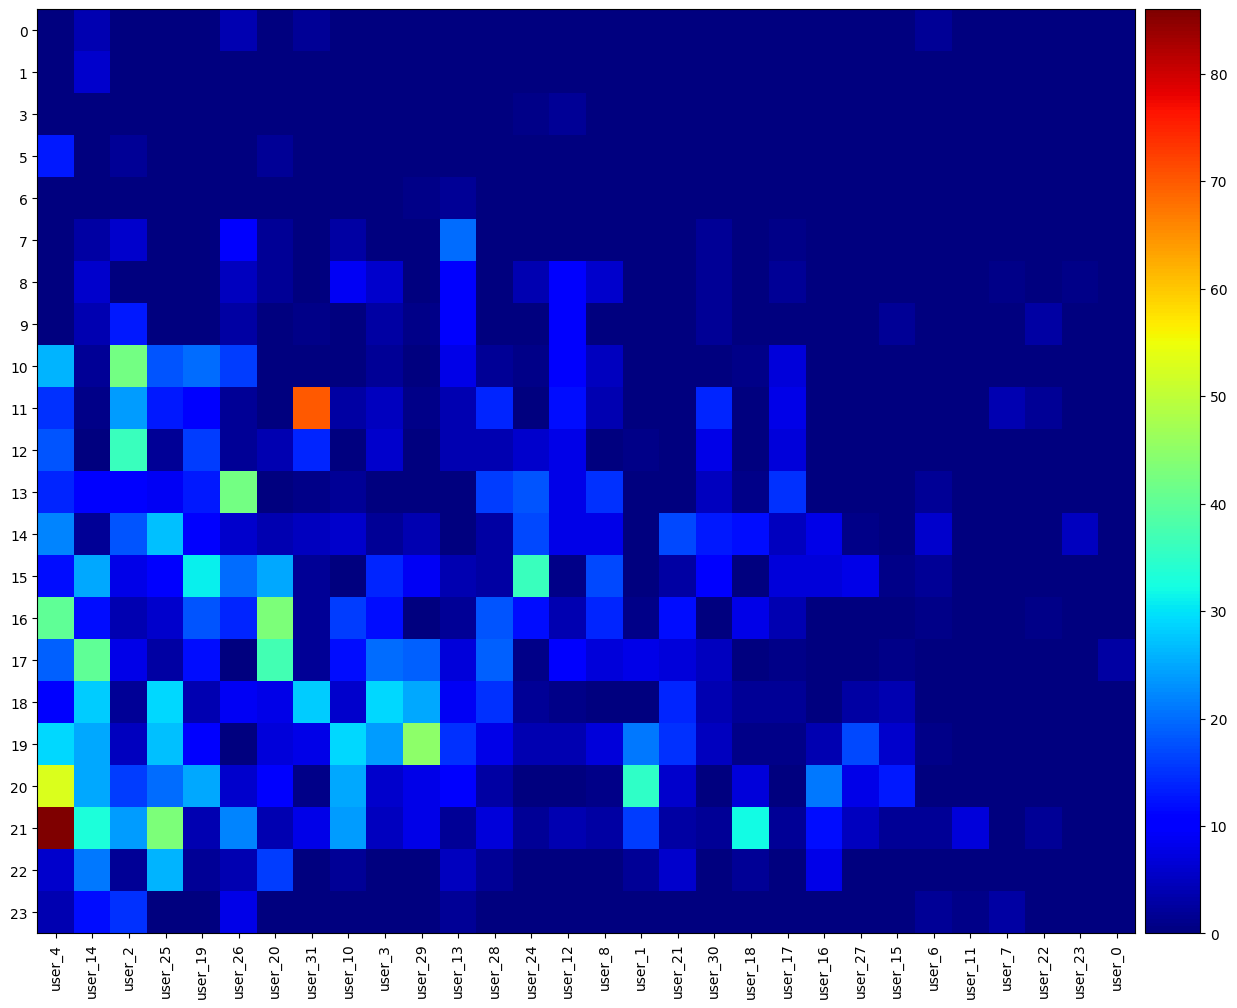

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
divider = make_axes_locatable(ax)
cax  = divider.append_axes("right", size="5%", pad=0.1)
im = ax.imshow(weekday, cmap='RdBu', aspect='auto')
fig.colorbar(im, cax=cax)
ax.set_xticks(range(len(weekday.columns)))
ax.set_xticklabels(weekday.columns, rotation=90)
ax.set_yticks(range(len(weekday.index)))
ax.set_yticklabels(weekday.index)
plt.show()


fig, ax = plt.subplots(figsize=(15, 12))
divider = make_axes_locatable(ax)
cax  = divider.append_axes("right", size="5%", pad=0.1)
im = ax.imshow(hour, cmap='jet', aspect='auto')
fig.colorbar(im, cax=cax)
ax.set_xticks(range(len(hour.columns)))
ax.set_xticklabels(hour.columns, rotation=90)
ax.set_yticks(range(len(hour.index)))
ax.set_yticklabels(hour.index)
plt.show()

## Which user has the most commits on Tue?
* user_2

## Which user has the most commits on Thu?
* user_3

## On which weekday do the users not like making a lot of commits?
* Friday

## Which user at which hour made the largest number of commits?
* user_4, 21